In [1]:
###keras and Tensorflow >2.0

In [2]:
#Data Collection
import pandas_datareader as pdr

In [3]:
import requests
import pandas as pd

api_key = 'f7bb39c8d7060754a714620b02db873cfb617bc5'
headers = {
    'Content-Type': 'application/json',
    'Authorization': 'Token ' + api_key
}
url = 'https://api.tiingo.com/tiingo/daily/AAPL/prices'

# Specify the date range (e.g., the past year)
params = {
    'startDate': '2023-01-01',
    'endDate': '2023-12-31',
    'resampleFreq': 'daily'  # Optional: 'daily', 'weekly', 'monthly'
}

response = requests.get(url, headers=headers, params=params)
data = response.json()
df = pd.DataFrame(data)
print(df)



                         date   close      high      low     open     volume  \
0    2023-01-03T00:00:00.000Z  125.07  130.9000  124.170  130.280  112117471   
1    2023-01-04T00:00:00.000Z  126.36  128.6557  125.080  126.890   89113633   
2    2023-01-05T00:00:00.000Z  125.02  127.7700  124.760  127.130   80962708   
3    2023-01-06T00:00:00.000Z  129.62  130.2900  124.890  126.010   87754715   
4    2023-01-09T00:00:00.000Z  130.15  133.4100  129.890  130.465   70790813   
..                        ...     ...       ...      ...      ...        ...   
245  2023-12-22T00:00:00.000Z  193.60  195.4100  192.970  195.180   37149570   
246  2023-12-26T00:00:00.000Z  193.05  193.8900  192.830  193.610   28919310   
247  2023-12-27T00:00:00.000Z  193.15  193.5000  191.090  192.490   47899806   
248  2023-12-28T00:00:00.000Z  193.58  194.6600  193.170  194.140   34049898   
249  2023-12-29T00:00:00.000Z  192.53  194.4000  191.725  193.900   42672148   

       adjClose     adjHigh      adjLow

In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('AAPL.csv')

In [7]:
df.head()

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,2023-01-03T00:00:00.000Z,125.07,130.9000,124.17,130.280,112117471,123.908415,129.684268,123.016773,129.070027,112117471,0.0,1.0
1,1,2023-01-04T00:00:00.000Z,126.36,128.6557,125.08,126.890,89113633,125.186434,127.460812,123.918322,125.711511,89113633,0.0,1.0
2,2,2023-01-05T00:00:00.000Z,125.02,127.7700,124.76,127.130,80962708,123.858879,126.583338,123.601294,125.949282,80962708,0.0,1.0
3,3,2023-01-06T00:00:00.000Z,129.62,130.2900,124.89,126.010,87754715,128.416156,129.079934,123.730086,124.839684,87754715,0.0,1.0
4,4,2023-01-09T00:00:00.000Z,130.15,133.4100,129.89,130.465,70790813,128.941234,132.170957,128.683649,129.253309,70790813,0.0,1.0


In [8]:
df.tail()

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
245,245,2023-12-22T00:00:00.000Z,193.60,195.41,192.970,195.18,37149570,192.868905,194.672070,192.241284,194.442938,37149570,0.0,1.0
246,246,2023-12-26T00:00:00.000Z,193.05,193.89,192.830,193.61,28919310,192.320982,193.157810,192.101813,192.878867,28919310,0.0,1.0
247,247,2023-12-27T00:00:00.000Z,193.15,193.50,191.090,192.49,47899806,192.420604,192.769283,190.368384,191.763097,47899806,0.0,1.0
248,248,2023-12-28T00:00:00.000Z,193.58,194.66,193.170,194.14,34049898,192.848981,193.924902,192.440529,193.406866,34049898,0.0,1.0
249,249,2023-12-29T00:00:00.000Z,192.53,194.40,191.725,193.90,42672148,191.802946,193.665884,191.000986,193.167772,42672148,0.0,1.0


In [9]:
df1=df.reset_index()['close'] 

In [10]:
df1.shape

(250,)

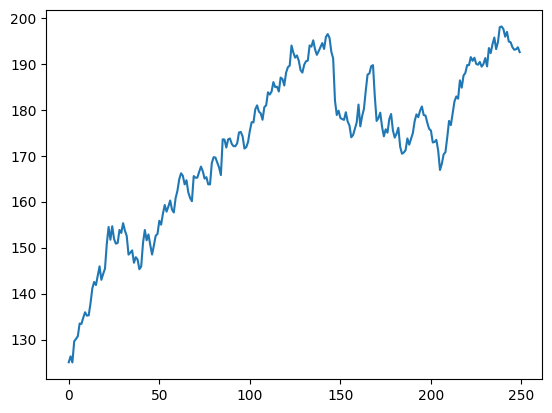

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
### Applying MinMax scaler

In [13]:
import numpy as np

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
df1.shape

(250, 1)

In [16]:
### splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [17]:
training_size,test_size

(162, 88)

In [18]:
train_data

array([[6.84088111e-04],
       [1.83335614e-02],
       [0.00000000e+00],
       [6.29361062e-02],
       [7.01874401e-02],
       [7.81228622e-02],
       [1.15884526e-01],
       [1.14789985e-01],
       [1.33260364e-01],
       [1.49404843e-01],
       [1.39417157e-01],
       [1.40238063e-01],
       [1.75810644e-01],
       [2.20139554e-01],
       [2.39567656e-01],
       [2.30400876e-01],
       [2.59132576e-01],
       [2.86085648e-01],
       [2.45998085e-01],
       [2.63647558e-01],
       [2.79244767e-01],
       [3.52989465e-01],
       [4.03338350e-01],
       [3.65439869e-01],
       [4.05390614e-01],
       [3.68039403e-01],
       [3.53673553e-01],
       [3.55589000e-01],
       [3.94445205e-01],
       [3.85552059e-01],
       [4.14694213e-01],
       [3.92529758e-01],
       [3.76658914e-01],
       [3.20974141e-01],
       [3.26857299e-01],
       [3.33561363e-01],
       [2.96757422e-01],
       [3.13312355e-01],
       [3.06334656e-01],
       [2.77602955e-01],


In [19]:
    import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(151, 10)
(151,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape) 

(77, 10)
(77,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
### Create the Stacked LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input

In [25]:

model = Sequential()
model.add(Input(shape=(100, 1)))  # Specify the input shape using the Input layer
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [26]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 298ms/step - loss: 0.3955 - val_loss: 0.3853
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2234 - val_loss: 0.1565
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0723 - val_loss: 0.0064
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0145 - val_loss: 0.0666
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0527 - val_loss: 0.0129
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0120 - val_loss: 0.0169
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0118 - val_loss: 0.0396
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0217 - val_loss: 0.0354
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0175 - val_loss: 0.0167
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0079 - val_loss: 0.0061
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0073 - val_loss: 0.0084
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0105 - val_l

In [28]:
import tensorflow as tf

In [29]:
tf.__version__

'2.17.0'

In [30]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [31]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)



In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


169.62728653393165

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))


181.69001229091748

In [46]:
print("Shape of df1:", df1.shape)
print("Shape of train_predict:", train_predict.shape)
print("Shape of trainPredictPlot:", trainPredictPlot[look_back:look_back + len(train_predict), :].shape)


Shape of df1: (250, 1)
Shape of train_predict: (151, 1)
Shape of trainPredictPlot: (150, 1)


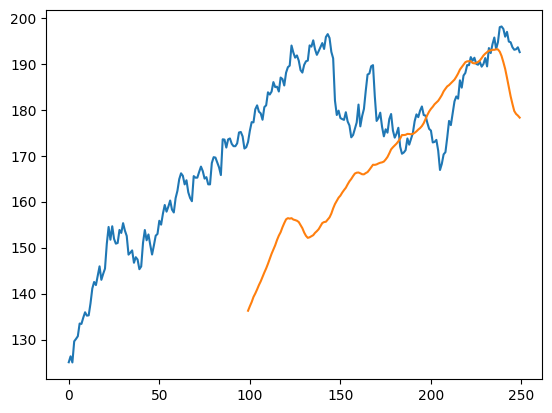

In [48]:
import numpy as np
import matplotlib.pyplot as plt

look_back = 100

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan

trainPredictPlot[look_back - 1:look_back - 1 + len(train_predict), :] = train_predict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [49]:
 len(test_data)


88

In [54]:
x_input=test_data[78:].reshape(1,-1)
x_input.shape

(1, 10)

In [57]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [58]:
temp_input



[[0.9926118484060744],
 [0.9696264878916403],
 [0.9839923382131617],
 [0.9551238199480094],
 [0.9530715556163631],
 [0.9382952524285124],
 [0.9307702832124778],
 [0.9321384594335749],
 [0.9380216171842934],
 [0.9236557668627716]]

In [59]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9443977]
11
[0.9443977]
12
[0.9443977]
13
[0.9443977]
14
[0.9443977]
15
[0.9443977]
16
[0.9443977]
17
[0.9443977]
18
[0.9443977]
19
[0.9443977]
20
[0.9443977]
21
[0.9443977]
22
[0.9443977]
23
[0.9443977]
24
[0.9443977]
25
[0.9443977]
26
[0.9443977]
27
[0.9443977]
28
[0.9443977]
29
[0.9443977]
30
[0.9443977]
31
[0.9443977]
32
[0.9443977]
33
[0.9443977]
34
[0.9443977]
35
[0.9443977]
36
[0.9443977]
37
[0.9443977]
38
[0.9443977]
39
[0.9443977]
40
[[0.9443976879119873], [0.9443976879119873], [0.9443976879119873], [0.9443976879119873], [0.9443976879119873], [0.9443976879119873], [0.9443976879119873], [0.9443976879119873], [0.9443976879119873], [0.9443976879119873], [0.9443976879119873], [0.9443976879119873], [0.9443976879119873], [0.9443976879119873], [0.9443976879119873], [0.9443976879119873], [0.9443976879119873], [0.9443976879119873], [0.9443976879119873], [0.9443976879119873], [0.9443976879119873], [0.9443976879119873], [0.9443976879119873], [0.9443976879119873], [0.9443976879119873],

In [60]:
day_new=np.arange(1,11)
day_pred=np.arange(11,31)



In [61]:
import matplotlib.pyplot as plt
len(df1)


250

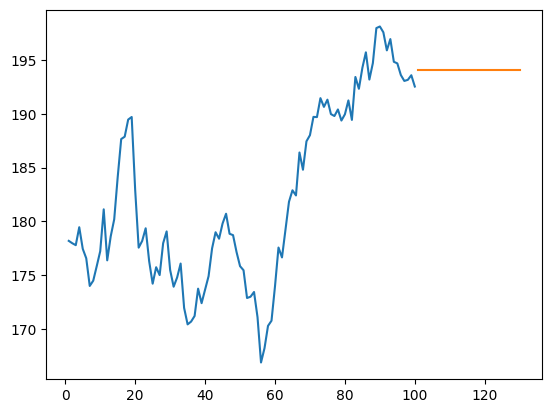

In [76]:
# Slice df1 to match the length of day_new
df1_slice = df1[-len(day_new):]  # Get the last 100 values from df1

# Plot
plt.plot(day_new, scaler.inverse_transform(df1_slice))
plt.plot(day_pred, scaler.inverse_transform(lst_output))
plt.show()



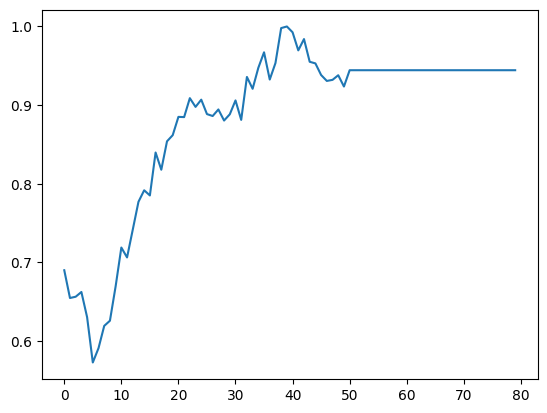

In [77]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[200:])

In [78]:
df3=scaler.inverse_transform(df3).tolist()

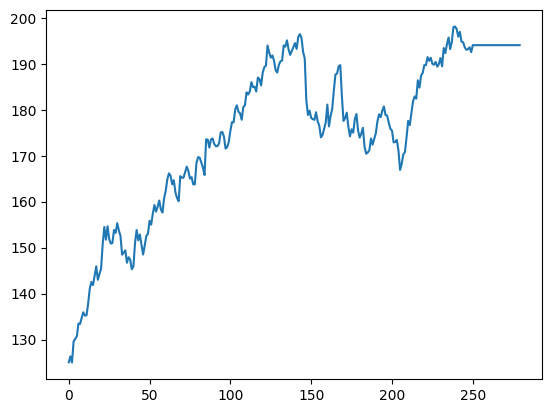

In [79]:
plt.plot(df3)